In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import yfinance as yf

In [2]:
gold = yf.Ticker("ABX.TO")
gold_df = gold.history(period='max')
gold_df = gold_df.drop(columns=["Dividends", "Stock Splits"])
gold_df = gold_df.loc['2010':'2020']
gold_df = gold_df.dropna()
gold_df["Target Close"] = gold_df['Close'].shift(periods=-1)
gold_df.rename(columns = {"Close": "Bar Close"},  inplace = True)
gold_df.head()

,Open,High,Low,Bar Close,Volume,Target Close
Date,,,,,,
2010-01-04,36.226494,36.602875,35.781685,35.995537,3070100,36.337681
2010-01-05,36.140938,36.457437,35.661909,36.337681,2996000,36.936466
2010-01-06,36.662736,37.424048,36.465993,36.936466,2944700,36.474537
2010-01-07,36.696944,36.782484,36.226468,36.474537,2420100,36.560101
2010-01-08,36.825275,36.842383,36.089624,36.560101,2648000,36.782501


In [6]:
oil = yf.Ticker("CL=F")
oil_df = oil.history(period='max')
oil_df = pd.DataFrame(oil_df["Close"])
oil_df = oil_df.loc['2010':'2020']
oil_df = oil_df.dropna()
oil_df.rename(columns = {"Close": "Oil Close"},  inplace = True)
oil_df.head()

,Oil Close
Date,
2010-01-04,81.510002
2010-01-05,81.769997
2010-01-06,83.180000
2010-01-07,82.660004
2010-01-08,82.750000


In [5]:
gld = yf.Ticker("GC=F")
gld_df = gld.history(period='max')
gld_df = pd.DataFrame(gld_df["Close"])
gld_df = gld_df.loc['2010':'2020']
gld_df = gld_df.dropna()
gld_df.rename(columns = {"Close": "Gold Close"},  inplace = True)
gld_df.head()

,Gold Close
Date,
2010-01-04,1117.699951
2010-01-05,1118.099976
2010-01-06,1135.900024
2010-01-07,1133.099976
2010-01-08,1138.199951


In [10]:
cad = yf.Ticker("CAD=X")
cad_df = cad.history(period='max')
cad_df = pd.DataFrame(cad_df["Close"])
cad_df = cad_df.loc['2010':'2020']
cad_df = cad_df.dropna()
cad_df.rename(columns = {"Close": "CAD Close"},  inplace = True)
cad_df.head()

,CAD Close
Date,
2010-01-01,1.0512
2010-01-04,1.0410
2010-01-05,1.0395
2010-01-06,1.0319
2010-01-07,1.0340


In [11]:
tsx = yf.Ticker("^GSPTSE")
tsx_df = tsx.history(period='max')
tsx_df = pd.DataFrame(tsx_df["Close"])
tsx_df = tsx_df.loc['2010':'2020']
tsx_df = tsx_df.dropna()
tsx_df.rename(columns = {"Close": "TSX Close"},  inplace = True)
tsx_df.head()

,TSX Close
Date,
2010-01-04,11866.900391
2010-01-05,11888.099609
2010-01-06,11944.500000
2010-01-07,11887.500000
2010-01-08,11953.799805


In [12]:
goldmodel_df = pd.concat([gold_df, oil_df, gld_df, cad_df, tsx_df], axis=1, join="inner")
goldmodel_df = goldmodel_df.dropna()

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt

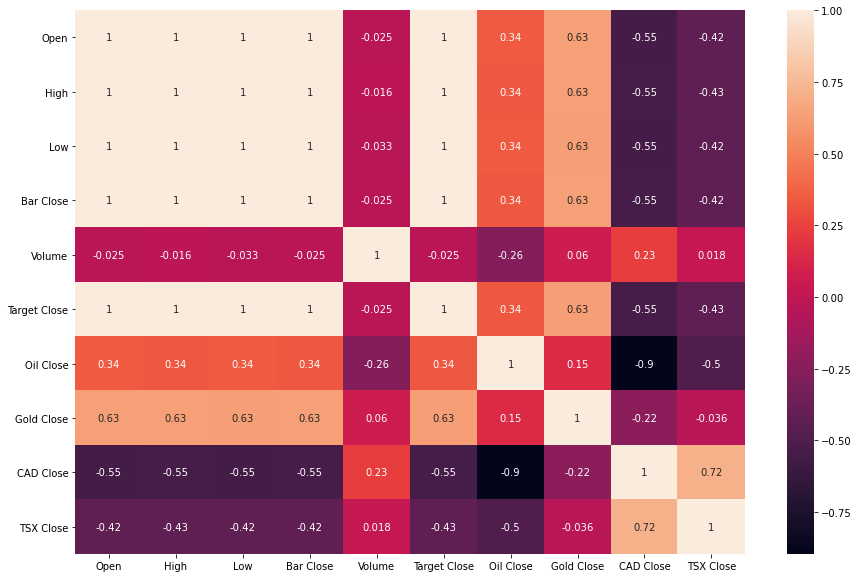

In [15]:
corrmat = goldmodel_df.corr()
fig, heat = plt.subplots(figsize = (15, 10))
heat = sn.heatmap(corrmat, annot=True)
plt.show()

In [17]:
gold_df = goldmodel_df[["Open", "High", "Low", "Volume", "Oil Close", "Gold Close", "CAD Close", "TSX Close", "Bar Close"]]
gold_df

,Open,High,Low,Volume,Oil Close,Gold Close,CAD Close,TSX Close,Bar Close
Date,,,,,,,,,
2010-01-04,36.226494,36.602875,35.781685,3070100,81.510002,1117.699951,1.04100,11866.900391,35.995537
2010-01-05,36.140938,36.457437,35.661909,2996000,81.769997,1118.099976,1.03950,11888.099609,36.337681
2010-01-06,36.662736,37.424048,36.465993,2944700,83.180000,1135.900024,1.03190,11944.500000,36.936466
2010-01-07,36.696944,36.782484,36.226468,2420100,82.660004,1133.099976,1.03400,11887.500000,36.474537
2010-01-08,36.825275,36.842383,36.089624,2648000,82.750000,1138.199951,1.02980,11953.799805,36.560101
...,...,...,...,...,...,...,...,...,...
2020-12-21,29.940001,30.070000,29.480000,3959000,47.740002,1879.199951,1.28106,17500.900391,29.590000
2020-12-22,29.650000,29.730000,28.760000,3344600,47.020000,1866.599976,1.28532,17552.500000,29.040001
2020-12-23,29.100000,29.620001,29.059999,2337300,48.119999,1874.699951,1.28933,17593.599609,29.389999


In [20]:
gold_df.Volume = gold_df.Volume.astype(float) 
gold_df.dtypes

C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Open          float64
High          float64
Low           float64
Volume        float64
Oil Close     float64
Gold Close    float64
CAD Close     float64
TSX Close     float64
Bar Close     float64
dtype: object

In [21]:
gold_csv_data = gold_df.to_csv('gold.csv', index = True) 